In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 2.5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

In [2]:
import datajoint as dj
dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'ibl-public'
dj.config['database.password'] = 'ibl-public'

In [3]:
print(dj.list_schemas())

[2023-07-14 19:41:41,157][INFO]: Connecting ibl-public@datajoint-public.internationalbrainlab.org:3306
[2023-07-14 19:41:42,972][INFO]: Connected ibl-public@datajoint-public.internationalbrainlab.org:3306


['ibl_acquisition', 'ibl_action', 'ibl_analyses_behavior', 'ibl_analyses_ephys', 'ibl_behavior', 'ibl_data', 'ibl_ephys', 'ibl_group_shared_wheel', 'ibl_histology', 'ibl_plotting_behavior', 'ibl_plotting_ephys', 'ibl_plotting_histology', 'ibl_qc', 'ibl_reference', 'ibl_subject']


## Schemas to be loaded with datajoint

In [4]:
from nma_ibl import acquisition, action, behavior, data, reference, subject

## Subject (Mouse) DATABASE

### Showing some data

In [5]:
# dj.Diagram(subject) #.save(filename='subject.png', format='png')

In [6]:
df = subject.Subject.fetch(format='frame')
df[:4]

,subject_nickname,sex,subject_birth_date,ear_mark,subject_line,subject_strain,subject_source,protocol_number,subject_description,subject_ts
subject_uuid,,,,,,,,,,
00778394-c956-408d-8a6c-ca3b05a611d5,KS019,F,2019-04-30,None,C57BL/6J,None,None,3,None,2020-01-13 23:39:00
019a22c1-b944-4494-9e38-0e45ae6697bf,SWC_022,M,2019-06-18,NA (Front HP),C57BL/6J,None,Charles River,4,ID: 990762,2020-01-13 23:39:01
01be78e7-8741-4b40-bd64-79ed745431b5,CSHL057,M,2019-10-15,L,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:01
02120449-9b19-4276-a434-513886c2fb19,ibl_witten_07,F,2018-11-13,None,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:01


In [7]:
df.to_csv("data/subject.csv")

In [8]:
df.columns

Index(['subject_nickname', 'sex', 'subject_birth_date', 'ear_mark',
       'subject_line', 'subject_strain', 'subject_source', 'protocol_number',
       'subject_description', 'subject_ts'],
      dtype='object')

In [9]:
print('df.shape', df.shape)
print('..........')
print(df.dtypes)

df.shape (233, 10)
..........
subject_nickname               object
sex                            object
subject_birth_date             object
ear_mark                       object
subject_line                   object
subject_strain                 object
subject_source                 object
protocol_number                 int64
subject_description            object
subject_ts             datetime64[ns]
dtype: object


In [10]:
df['subject_nickname'] = df['subject_nickname'].astype('str')
df['sex'] = df['sex'].astype('str')
df['subject_birth_date'] = df['subject_birth_date'].astype('str')
df['ear_mark'] = df['ear_mark'].astype('str')
df['subject_line'] = df['subject_line'].astype('str')
df['subject_strain'] = df['subject_strain'].astype('str')
df['subject_source'] = df['subject_source'].astype('str')
df['protocol_number'] = df['protocol_number'].astype('str')
df['subject_description'] = df['subject_description'].astype('str')
df['subject_ts'] = df['subject_ts'].astype('str')

In [11]:
# numerical = df.dtypes[(df.dtypes != "object") & (titanic_train.dtypes != "category")].index
# categorical = titanic_train.dtypes[(df.dtypes == "object") | (titanic_train.dtypes == "category")].index

def get_numcat_cols(titanic_train):
    numerical = titanic_train._get_numeric_data().columns
    categorical = titanic_train.columns.difference(numerical)
    return (numerical, categorical)

## Categorical Data

- count = count of non-NaN records
- unique = number of unique categories
- top = the most frequently occurring value
- freq = the number of occurrences of the most frequent value

In [12]:
numerical, categorical = get_numcat_cols(df)
df[categorical].describe()

,subject_nickname,sex,subject_birth_date,ear_mark,subject_line,subject_strain,subject_source,protocol_number,subject_description,subject_ts
count,233,233,233,233,233,233,233,233,233,233
unique,233,2,77,52,2,2,4,4,26,94
top,KS019,M,2018-10-23,None,C57BL/6J,None,Jax,3,None,2019-09-18 01:17:37
freq,1,144,11,62,199,201,105,139,202,14


## Is there Numerical Data

- There is no Numerical Data

## Are there NA Values or Strange Values?

- There is no Missing Data
- Strange Values?

In [13]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

## Histograms

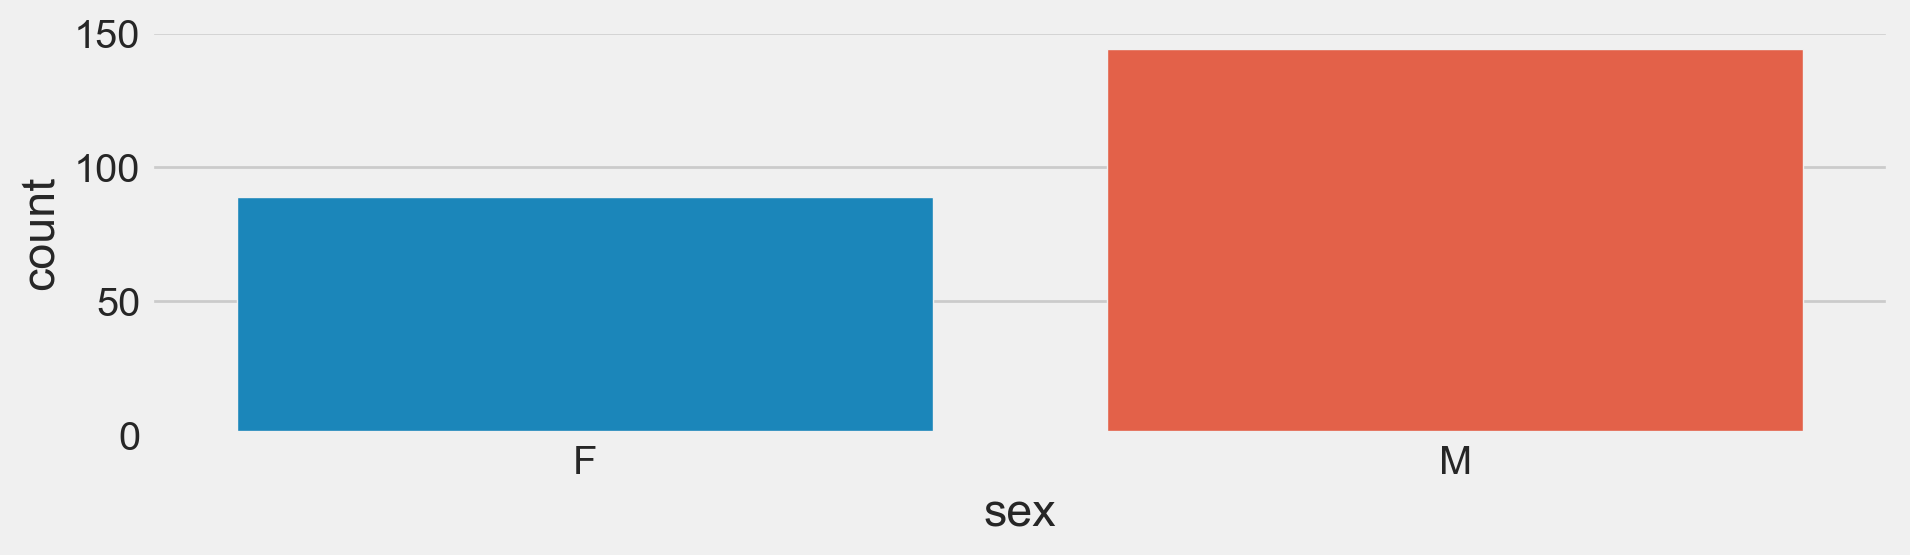

In [14]:
features = categorical.tolist()
sns.countplot(x='sex', data=df);

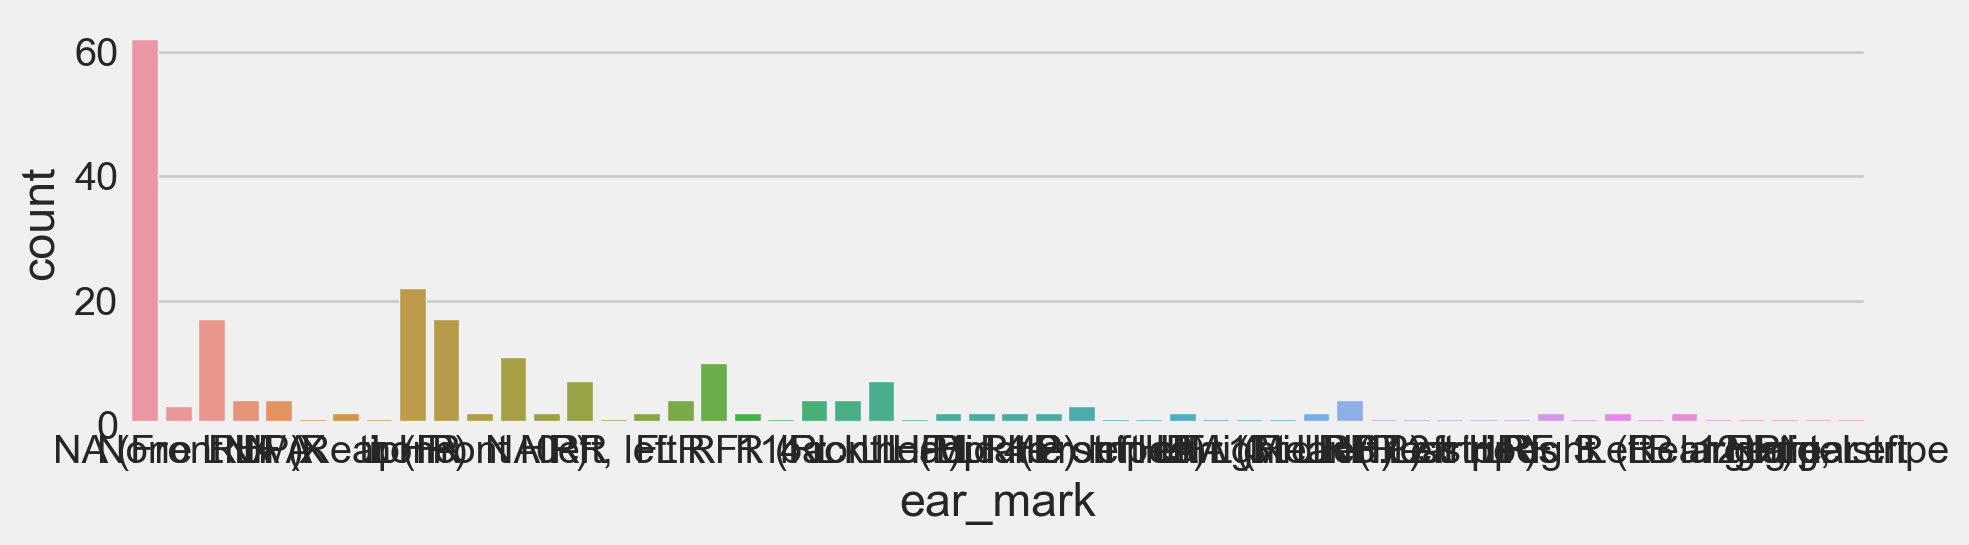

In [15]:
features = categorical.tolist()
sns.countplot(x='ear_mark', data=df);

In [16]:
df['subject_nickname'].value_counts()

subject_nickname
KS019            1
ZM_2106          1
DY_005           1
CSHL049          1
SWC_060          1
                ..
CSHL051          1
NYU-25           1
ibl_witten_03    1
SWC_008          1
ZM_2240          1
Name: count, Length: 233, dtype: int64

In [17]:
df['subject_nickname'].unique()

array(['KS019', 'SWC_022', 'CSHL057', 'ibl_witten_07', 'KS031', 'ZM_1092',
       'KS004', 'ibl_witten_19', 'SWC_038', 'SWC_005', 'CSH_ZAD_007',
       'CSHL_007', 'ZFM-02372', 'DY_013', 'SWC_029', 'DY_015', 'SWC_002',
       'ibl_witten_23', 'NYU-11', 'CSH_ZAD_010', 'CSHL_015',
       'ibl_witten_18', 'SWC_035', 'ZM_1093', 'CSHL047', 'DY_010',
       'NYU-20', 'NYU-23', 'KS014', 'CSH_ZAD_024', 'CSHL_010', 'SWC_007',
       'KS044', 'DY_018', 'ZM_1373', 'KS030', 'ZM_3004', 'CSH_ZAD_022',
       'ZM_1746', 'ZM_2245', 'NYU-01', 'CSHL053', 'NYU-14',
       'ibl_witten_06', 'SWC_001', 'CSHL060', 'ibl_witten_11',
       'ZFM-02373', 'KS003', 'NYU-21', 'DY_006', 'NYU-30', 'ZM_3003',
       'SWC_017', 'IBL-T4', 'KS016', 'NYU-24', 'CSHL055', 'ZFM-01936',
       'ZM_1089', 'SWC_019', 'SWC_042', 'ZM_1745', 'NYU-02', 'SWC_016',
       'CSH_ZAD_015', 'ibl_witten_29', 'SWC_040', 'DY_007', 'ZFM-02369',
       'ZM_1095', 'CSHL_002', 'ibl_witten_26', 'SWC_013', 'KS021',
       'CSH_ZAD_004', 'DY_014',

In [18]:
def check_repeated_categories(df, column_name):
    repeated_categories = []
    counts = df[column_name].value_counts()
    for category, count in counts.items():
        if count > 1:
            repeated_categories.append(category)
    
    return repeated_categories

In [19]:
repeated_categories = check_repeated_categories(df, 'subject_nickname')
print("Repeated categories:", repeated_categories)

Repeated categories: []
